# #2_Bucks image : 힙합 / 비힙합은 앨범 커버에 차이가 있을까?

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
#from keras.callbacks import ModelCheckpoint, TensorBoard

from IPython.display import Image
import os

/home/ubunt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15277190473747686618
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3227320320
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8607532586722261809
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
image_path = "/home/ubunt/3-2/Unstructured/project/data/train_image"

# 힙합 이미지 예시

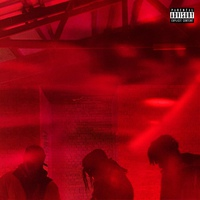

In [4]:
Image(filename=image_path + '/hiphop/hip_hop_0.jpg')

'과연 앨범 커버로 힙합 비힙합 분류가 가능할까?'란 생각이 22번 사진을 보고 들었다...

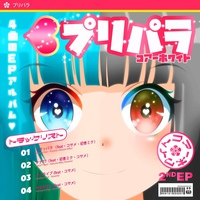

In [5]:
Image(filename=image_path + '/hiphop/hip_hop_22.jpg')

# 비힙합 이미지 예시

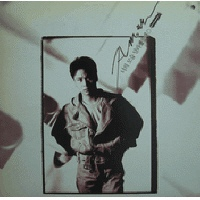

In [6]:
Image(filename=image_path + '/else/ballad_0.jpg')

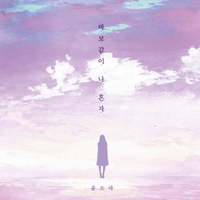

In [7]:
Image(filename=image_path + '/else/rnb_0.jpg')

# CNN 모델 구축 시작

Data load

In [14]:
img_gen = ImageDataGenerator(
        horizontal_flip=True   # 좌우 뒤집기
    )

train = img_gen.flow_from_directory(
    image_path,     # 이미지 디렉토리
    target_size=(200, 200),
    color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
    class_mode='binary')    # 고양이 vs. 개로 binary 분류


Found 7314 images belonging to 2 classes.


In [15]:
train[0][0].shape

(32, 200, 200, 3)

relu 활성 함수의 초기값은 he_normal로 지정해주는게 더 빠른 수렴을 보장한다하여 바꾸어 주었습니다.

batchnorm을 사용하여 dropout을 사용하지 않았습니다.

In [16]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(200, 200, 3))) # 200 * 200
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal')) # 198 * 198
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal')) # 196 * 196
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal')) # 194 * 194
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal')) # 192 * 192
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) # 96 * 96

model.add(Conv2D(16, (3,3), activation = "relu", kernel_initializer='he_normal')) # 94 * 94
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), activation = "relu", kernel_initializer='he_normal')) # 92 * 92
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) # 46 * 46

model.add(Conv2D(16, (3,3), activation = "relu", kernel_initializer='he_normal')) # 44 * 44
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), activation = "relu", kernel_initializer='he_normal')) # 42 * 42
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) # 21 * 21

model.add(Flatten())
model.add(Dense(50, activation = "relu", kernel_initializer='he_normal'))
model.add(Dense(1, activation = "sigmoid"))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
batch_normalization_10 (Batc (None, 198, 198, 16)      64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 196, 196, 16)      2320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 196, 196, 16)      64        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 194, 194, 16)      2320      
_________________________________________________________________
batch_normalization_12 (Batc (None, 194, 194, 16)      64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 192, 192, 16)      2320      
__________

In [18]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [19]:
model.fit_generator(train, epochs=25, use_multiprocessing=True, workers=8)

Epoch 1/25
229/229 [==============================] - 61s 266ms/step - loss: 0.7184 - acc: 0.5699
Epoch 2/25
229/229 [==============================] - 59s 259ms/step - loss: 0.6713 - acc: 0.5995
Epoch 3/25
229/229 [==============================] - 59s 259ms/step - loss: 0.6594 - acc: 0.6089
Epoch 4/25
229/229 [==============================] - 59s 258ms/step - loss: 0.6588 - acc: 0.6134
Epoch 5/25
229/229 [==============================] - 60s 261ms/step - loss: 0.6497 - acc: 0.6177
Epoch 6/25
229/229 [==============================] - 60s 260ms/step - loss: 0.6440 - acc: 0.6296
Epoch 7/25
229/229 [==============================] - 59s 259ms/step - loss: 0.6379 - acc: 0.6310
Epoch 8/25
229/229 [==============================] - 60s 262ms/step - loss: 0.6504 - acc: 0.6187
Epoch 9/25
229/229 [==============================] - 59s 260ms/step - loss: 0.6347 - acc: 0.6306
Epoch 10/25
229/229 [==============================] - 60s 260ms/step - loss: 0.6248 - acc: 0.6414
Epoch 11/25
229/229

In [20]:
model.save_weights("cnn_acc77_batchnorm.hd5")